# World GDP Data Analysis

The aim of the project is to analysis the world GDP data from 2010 to 2020 . The data has been collected using web scraping from IMF website .

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Extracting the data from the website
url = "https://www.imf.org/en/Publications/WEO/weo-database/2021/April/weo-report?c=512,914,612,614,311,213,911,314,193,122,912,313,419,513,316,913,124,339,638,514,218,963,616,223,516,918,748,618,624,522,622,156,626,628,228,924,233,632,636,634,238,662,960,423,935,128,611,321,243,248,469,253,642,643,939,734,644,819,172,132,646,648,915,134,652,174,328,258,656,654,336,263,268,532,944,176,534,536,429,433,178,436,136,343,158,439,916,664,826,542,967,443,917,544,941,446,666,668,672,946,137,546,674,676,548,556,678,181,867,682,684,273,868,921,948,943,686,688,518,728,836,558,138,196,278,692,694,962,142,449,564,565,283,853,288,293,566,964,182,359,453,968,922,714,862,135,716,456,722,942,718,724,576,936,961,813,726,199,733,184,524,361,362,364,732,366,144,146,463,528,923,738,578,537,742,866,369,744,186,925,869,746,926,466,112,111,298,927,846,299,582,487,474,754,698,&s=NGDPD,&sy=2010&ey=2020&ssm=0&scsm=1&scc=0&ssd=1&ssc=0&sic=0&sort=country&ds=.&br=1"
response = requests.get(url).text
soup = BeautifulSoup(response , 'html5lib')
rows = soup.find_all('tr')

In [3]:
column_headers = []
list_header = rows[0].find_all('th')
for th in list_header:
    column_headers.append(th.getText())
column_headers.append('None')
column_headers

['Country',
 'Subject Descriptor',
 'Units',
 'Scale',
 'Country/Series-specific Notes',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 'None']

In [4]:
data=[]
for i in range(1,len(rows)):
    temp = rows[i]
    list_td = temp.find_all('td')
    data.append(list_td)
row_data = []
for j in range(0,len(data)) :
    temp_list = []
    for k in range(0,len(data[j])):
        temp_list.append(data[j][k].getText())
    row_data.append(temp_list)  

In [5]:
country_df = pd.DataFrame(row_data)
country_df.columns = column_headers
country_df.drop(['None','Country/Series-specific Notes'], axis=1, inplace=True)
country_df.head()

,Country,Subject Descriptor,Units,Scale,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,"Gross domestic product, current prices",U.S. dollars,Billions,15.325,17.890,20.293,20.170,20.635,20.220,17.994,18.910,18.401,18.876,19.132
1,Albania,"Gross domestic product, current prices",U.S. dollars,Billions,11.937,12.899,12.324,12.784,13.246,11.389,11.862,13.053,15.147,15.276,15.147
2,Algeria,"Gross domestic product, current prices",U.S. dollars,Billions,161.207,200.251,209.059,209.755,213.810,165.979,160.034,170.207,175.367,171.070,144.294
3,Angola,"Gross domestic product, current prices",U.S. dollars,Billions,83.799,111.790,128.053,136.710,145.712,116.194,101.124,122.124,105.902,89.603,62.440
4,Antigua and Barbuda,"Gross domestic product, current prices",U.S. dollars,Billions,1.149,1.138,1.200,1.181,1.250,1.337,1.437,1.468,1.605,1.662,1.390


In [6]:
years=['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
country_df=country_df.replace('n/a','0')
for year in years:
    country_df[year]=country_df[year].str.replace(',','').astype(float)
country_df.replace(to_replace="None" ,value=np.nan ,inplace=True)
country_df.dropna(how='any' ,thresh=5 ,axis=0 ,inplace=True)
country_df.drop_duplicates(subset='Country' , keep='first' , inplace=True , ignore_index=True)
country_df.drop(labels=['Subject Descriptor','Units','Scale'] , axis=1, inplace=True)
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  195 non-null    object 
 1   2010     195 non-null    float64
 2   2011     195 non-null    float64
 3   2012     195 non-null    float64
 4   2013     195 non-null    float64
 5   2014     195 non-null    float64
 6   2015     195 non-null    float64
 7   2016     195 non-null    float64
 8   2017     195 non-null    float64
 9   2018     195 non-null    float64
 10  2019     195 non-null    float64
 11  2020     195 non-null    float64
dtypes: float64(11), object(1)
memory usage: 18.4+ KB


# World GDP Analysis

In [7]:
world_df = country_df.copy()
world_df.loc['Total'] = world_df.sum(numeric_only=True)
world_df.at['Total','Country']='World GDP'
world_df = pd.melt(world_df , id_vars='Country' ,var_name="Year" ,value_name="GDP")
world_df.sort_values(by='Country')
world_df.set_index('Country' , inplace=True)

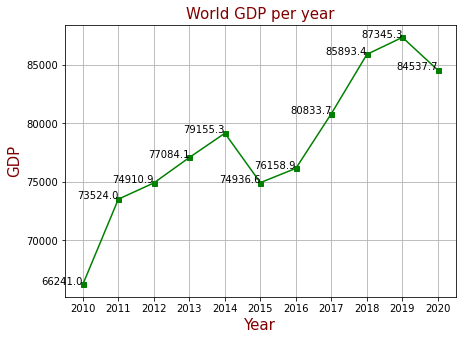

In [8]:
#GDP Growth over the past decade
%matplotlib inline
temp_df = world_df.loc['World GDP']
x=temp_df['Year']
y=temp_df['GDP'].round(decimals=1)
plt.figure(figsize=[7,5])
plt.plot(x,y,'s-g' , ms=5)
for index,value in zip(x,y):
    plt.text(index, value , str(value) ,size='medium',ha='right')
plt.xlabel("Year" ,size=15,color='Maroon')
plt.ylabel("GDP" ,size=15,color='Maroon')
plt.title("World GDP per year" ,size=15 ,color='Maroon')
plt.grid()
plt.show()

# Comparison between Countries

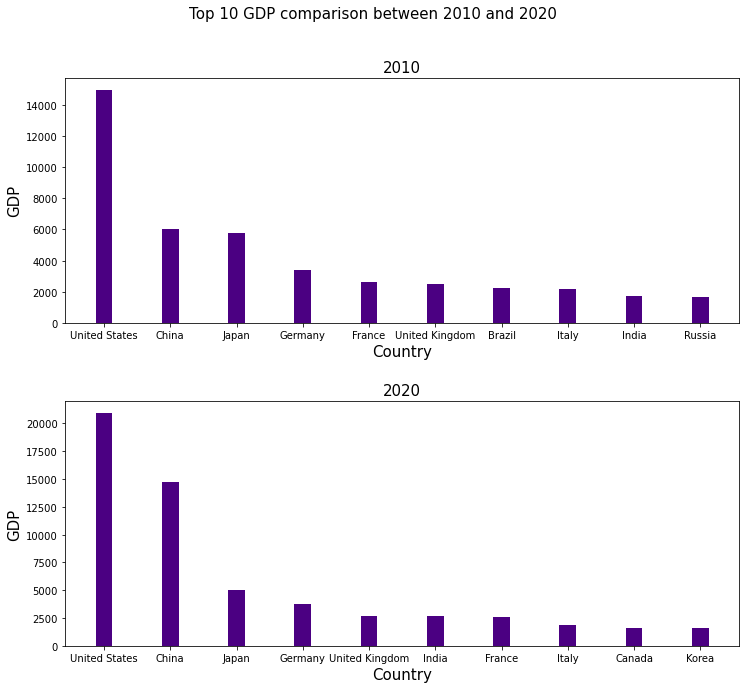

In [9]:
#Top 10 Countries in 2010 and 2020
df_2010 = country_df.sort_values(by='2010',ascending=False).head(10)
df_2020 = country_df.sort_values(by='2020',ascending=False).head(10)

plt.figure(figsize=[11,10])
#2010
plt.subplot(2,1,1)
plt.bar(df_2010['Country'],df_2010['2010'] , width=0.25 , color='indigo')
plt.xlabel("Country",size=15)
plt.ylabel("GDP",size=15)
plt.title("2010",size=15)
#2020
plt.subplot(2,1,2)
plt.bar(df_2020['Country'],df_2020['2020'], width=0.25 , color='indigo')
plt.xlabel("Country",size=15)
plt.ylabel("GDP",size=15)
plt.title("2020",size=15)

plt.tight_layout(pad=3.0)
plt.subplots_adjust(top=0.88)
plt.suptitle("Top 10 GDP comparison between 2010 and 2020",size=15)

plt.show()

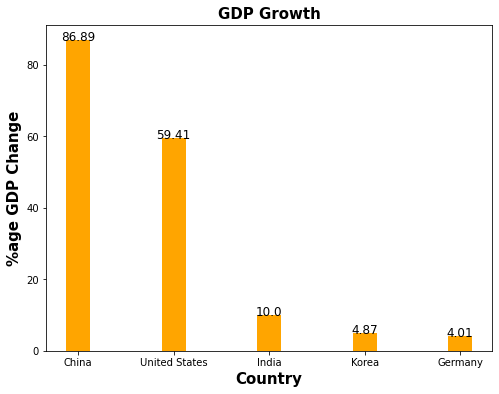

In [10]:
#%GDP change
df_change = country_df.copy()
df_change['%Change'] = (df_change['2020'] - df_change['2010'])/100
df_change_final = df_change.sort_values(by='%Change' ,ascending =False).head(5)

x_axis = df_change_final['Country'] 
y_axis = df_change_final['%Change'].round(decimals=2)
plt.figure(figsize=[8,6])
plt.bar(x_axis,y_axis ,width=0.25 , color='orange')
plt.xlabel("Country" ,size=15 ,fontweight='bold')
plt.ylabel("%age GDP Change" ,size=15, fontweight='bold')
plt.title('GDP Growth' ,size=15, fontweight='bold')

for index,value in zip(x_axis , y_axis):
    plt.text(index,value , str(value),size='large',ha='center', va='baseline',color = 'black')
plt.show()

# India's GDP Trend Analysis

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

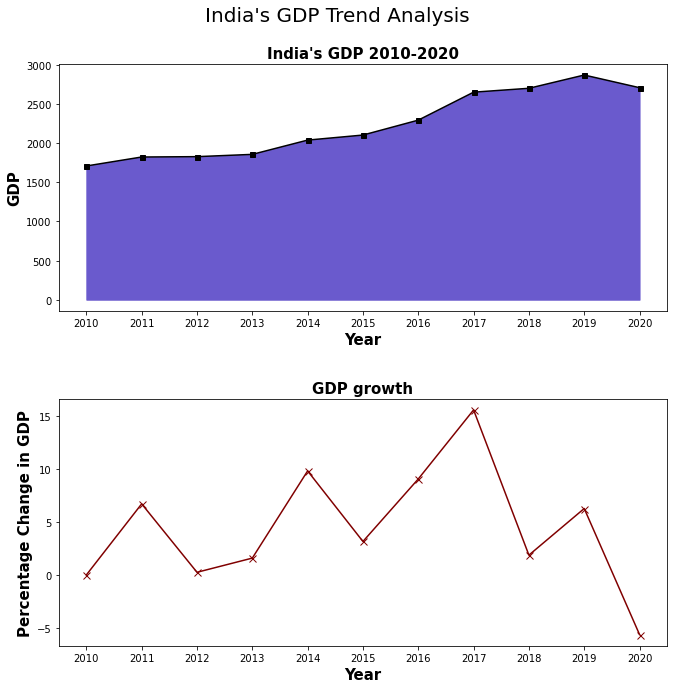

In [11]:
#India GDP Analysis
India_df = country_df.copy()
India_df_unpivoted = pd.melt(India_df , id_vars='Country' , var_name="Year" , value_name="GDP")
India_df_unpivoted.set_index('Country', inplace=True)
India_df_unpivoted = India_df_unpivoted.loc['India']
India_df.replace(np.nan , 0 , inplace=True)
India_df.set_index('Country' ,inplace=True)
India_df = India_df.pct_change(axis=1)
India_df.reset_index(inplace=True)
India_df_final = pd.melt(India_df , id_vars='Country' , var_name="Year" , value_name="%age Change in GDP")
India_df_final.set_index('Country' , inplace=True)
India_df_final = India_df_final.loc['India']
India_df_final.replace(np.nan , 0 ,inplace=True)
India_df_final['%age Change in GDP'] = India_df_final['%age Change in GDP']*100

#Plotting
plt.figure(figsize=[10,10])
#GDP over the years
x=India_df_unpivoted['Year']
y=India_df_unpivoted['GDP'].round(decimals=2)
plt.subplot(2,1,1)
plt.plot(x ,y , marker='s' , ms=5 , color='black')
plt.fill_between(x , y , color='slateBlue')
plt.xlabel("Year" , fontweight='bold',size=15)
plt.ylabel("GDP" , fontweight='bold',size=15)
plt.title("India's GDP 2010-2020" , fontweight='bold',size=15)

#Percentage Change
x=India_df_final['Year']
y=India_df_final['%age Change in GDP'].round(decimals=2)
plt.subplot(2,1,2)
plt.plot(x,y, marker='x',ms=7,color="maroon")
plt.xlabel("Year" ,fontweight='bold',size=15)
plt.ylabel("Percentage Change in GDP",fontweight='bold',size=15)
plt.title("GDP growth" ,fontweight='bold',size=15)

plt.suptitle("India's GDP Trend Analysis",size=20)
plt.tight_layout(pad=3.0)
plt.subplots_adjust(top=0.90)
plt.plot